# Cleaning of Data
We use this file to clean the data. Still work in progress...  
After use, save the cleaned versions in tx_cleaned.pkl, so we use the correct ones in the tasks.

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from proj1_helpers import load_csv_data

data_path = 'data/train.csv'
y, x, ids = load_csv_data(data_path, sub_sample=False)


array([100000, 100001, 100002, ..., 349997, 349998, 349999])

### Validate the data
In order to get a good feel of the dataset, we do some inference on the set. In the plot below we see that we have a lot of values that are -999. Those should be handled in the dataset.

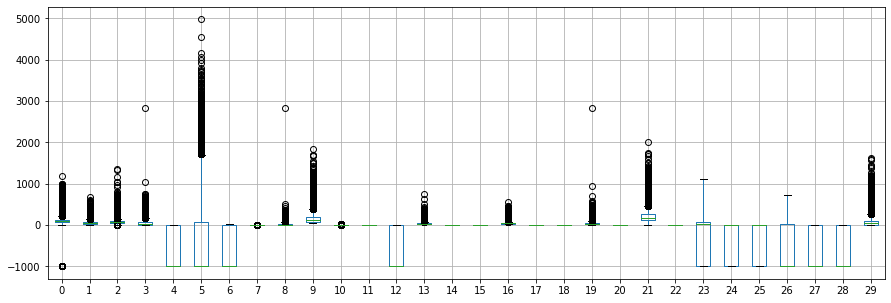

In [51]:
def boxplot(x):
    num_rows = 1
    num_cols = 1
    f, a = plt.subplots(num_rows, num_cols, figsize=(15,5))
    tx_df = pd.DataFrame(data=x)
    tx_df.boxplot()
    
boxplot(x)

- From the boxplot we see that many of the columns are distributed less than zero, even though a lot of the data is far above zero. A quick look at the dataset reveils a lot of values at -999, which has to be the go-to error-value in the dataset. Therefore we set all -999 to np.nan.


In [52]:
def remove_undefined_columns(x):
    """
    If more than 50% of the values in the column is -999, remove it.
    """
    bool_array = (np.count_nonzero(x==-999, axis=0) / x.shape[0]) > 0.5
    indicies = np.argwhere(bool_array == True).ravel()
    x = np.delete(x, indicies, axis=1)
    return x

In [53]:
def set_undefined_to_mean(x):
    """ 
    Sets all values equal to -999 to the mean of column.
    """
    x[x == -999] = np.nan
    x_mean = np.nanmean(x, axis = 0)
    indicies = np.where(np.isnan(x))
    x[indicies] = np.take(x_mean, indicies[1])
    
    return x

In [57]:
def remove_outliers(x):
    """
    Set all outliers that are more than 2 std from the mean to nan.
    """
    x_std = np.nanstd(x, axis = 0)
    x_mean = np.nanmean(x, axis = 0)
    
    x[x > x_mean + 2*x_std] = np.nan
    x[x < x_mean - 2*x_std] = np.nan
    
    return x
    

In [55]:
x = remove_undefined_columns(x)
x = set_undefined_to_mean(x)
# x = remove_outliers(x)
# Using Pandas to save to pickle
pd.DataFrame(data=x).to_pickle('./pickles/x_sub.pkl')
pd.DataFrame(data=y).to_pickle('./pickles/y_sub.pkl')



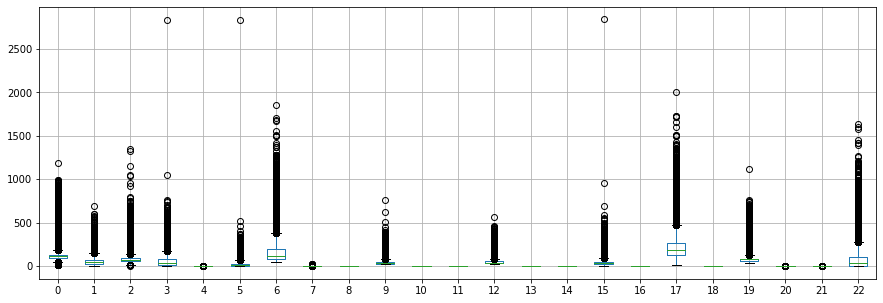

In [56]:
boxplot(x)